# CLASIFICADORES DE MNIST FASHION 

10 Clases de ropa

['Camiseta', 'Pantalon', 'Jersey', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Bota']

## Clasificadores usados:
- SVM (Scikit-learn)
- Red neuronal multicapa , MLP. (Tensorflow y Scikit-learn)
- OVO (Scikit-learn)

## Accuracys por clasificador 
| RESULTADOS POR MODELO  | Hiuperparametros | Acc   | Tiempo   | 
|------------------------|------------------|-------|----------|
| SVM                    |OVO --> Gamma ‘scale’ C = 1.0                    | 0.889 | 6.12 min |  
| SVM                    |OVA --> Gamma ‘scale’ C = 1.0                    | 0.889 | 5,8 min  |  
| MLP                    |***CO*** = 121  ***Alp*** = 0.01 ***Opt*** = Adam ***Iter*** = 250 ***Modo*** = Por Lotes | 0.864 | 5,25 min |   
| MLP                    |***CO*** = (100,30,20)  ***Alp*** = 0.01 ***Opt*** = Adam ***Iter*** = 250 ***Modo*** = Por Lotes | 0.885 | 7,32 min |   
| MLP (Tensorflow        |***CO*** = (100,60,20)  ***Alp*** = 0.01 ***Opt*** = Adam ***Iter*** = 250 ***Modo*** = Mini-batch de 1000 | 0.872 | 37,5 seg |  
| ADABOOST               | ***n_estimators*** = 100 | 0.853| 25 min |  
| ADABOOST               | ***n_estimators*** = 150 | 0.851| 39 min | 



  


# Librerias para el correcto funcionamiento del programa.

En caso de no tenerlas instaladas ejecutar siguiente comando:

`pip install -r requirements.txt`


In [1]:
import os
import sys
import time


import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier

from tensorflow import keras
import tensorflow as tf
from scikeras.wrappers import KerasClassifier

from tqdm import tqdm

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier



### Lectura del dataset "FASHION-MNIST"

Fashion-MNIST es un conjunto de datos de imágenes de artículos de Zalando que consta de un conjunto de entrenamiento de 60.000 ejemplos y un conjunto de prueba de 10.000 ejemplos. Cada ejemplo es una imagen en escala de grises de 28x28 asociada a una etiqueta de 10 clases. 

- Tamaño de imagen: 28x28
- Numero de imagenes train: 60000
- Numero de imagenes test: 10000
- Numero de clases: 10


In [2]:
test = np.loadtxt("archive/fashion-mnist_test.csv", delimiter=',', skiprows=1)
train = np.loadtxt("archive/fashion-mnist_train.csv",
                   delimiter=',', skiprows=1)

test = test[1:]
train = train[1:]

data = np.vstack((train, test))

X = data[:, 1:]
y = data[:, 0]

X = np.array(X)
y = np.array(y, dtype=np.uint8)


print("Numero ejemplos test: ",len(test))
print("Numero ejemplos train: ",len(train))

clases = ['Camiseta', 'Pantalon', 'Jersey', 'Vestido', 'Abrigo',
          'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Bota']

Numero ejemplos test:  9999
Numero ejemplos train:  59999


Text(0.5, 1.0, 'Fallos por clase')

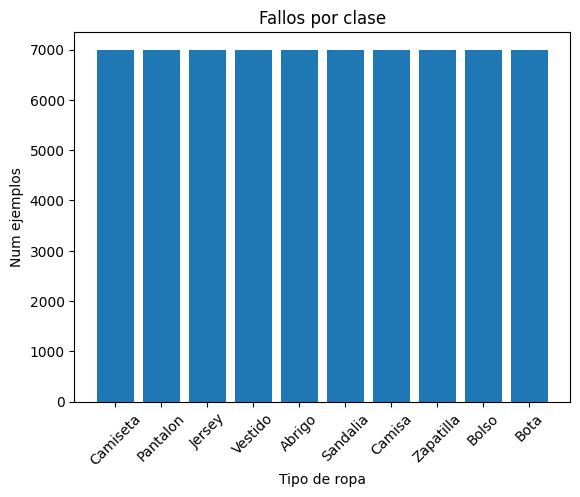

In [5]:
numPrenda = np.zeros(10)
for i in range(10):
    numPrenda[i] = np.sum(y == i)
plt.bar(clases, numPrenda)
plt.xticks(clases, ['Camiseta', 'Pantalon', 'Jersey', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Bota'], rotation=45)
plt.xlabel('Tipo de ropa')
plt.ylabel('Num ejemplos')

### Distribución del dataset:

Como podemos observar es un dataset equilibrado ya que tenemos mismo número de ejemplos de cada clase, por lo que no nos tenemos que preocupara en ese aspecto

### Ejemplos del dataset:


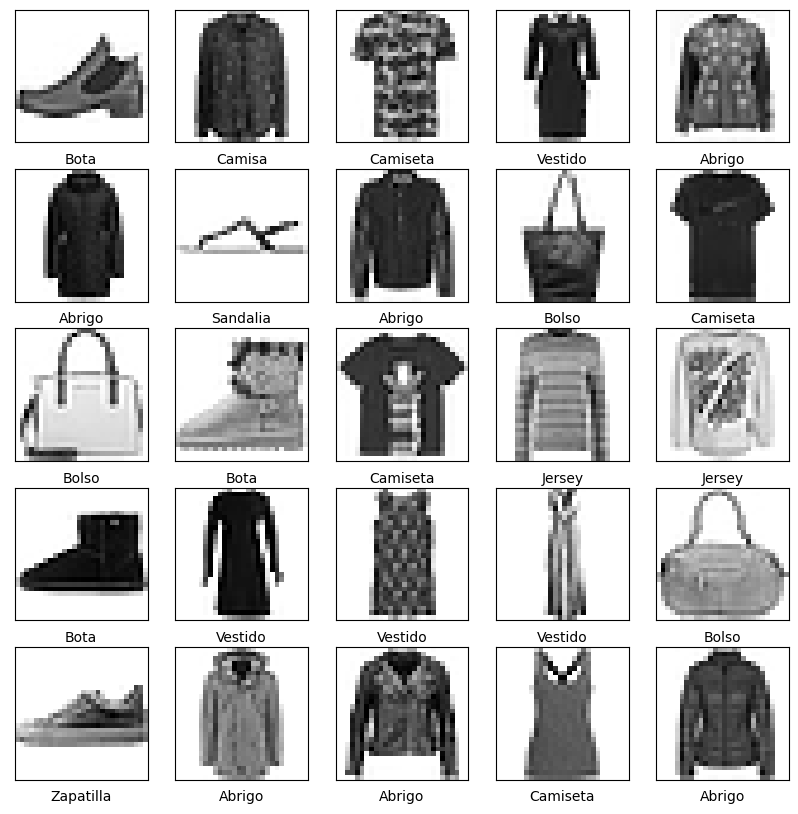

In [3]:

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(clases[int(y[i])])
plt.show()


### Uso del ShuffleSplit de Scikit-learn para dividir los datos en un conjunto deseado.




Aquí hemos decidido usar ShuffleSplit, aunque un kfold sería igualmente válido. Hemos dividido las particiones en un 80% para train y un 20% para el test.

In [3]:
rs = ShuffleSplit(n_splits=10, test_size=.20, random_state=0)
for train_index, test_index in rs.split(X, y):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]


print("SHAPE Xtrain", X_train.shape)
print("SHAPE y_train", y_train.shape)
print("SHAPE X_test", X_test.shape)
print("SHAPE y_test", y_test.shape)


SHAPE Xtrain (55998, 784)
SHAPE y_train (55998,)
SHAPE X_test (14000, 784)
SHAPE y_test (14000,)


## CLSIFICADOR 1: SVM (Scikit-learn)

El primer clasificador que usaremos va a ser el SVM de sklearn. Esta vez no optimizaremos los parámetros 'C' y 'gamma' ya que al ser un dataset relativamente grande con varios atributos (28x28), el tiempo que tarda en la optimización es demasiado grande para nuestros ordenadores (hicimos la prueba y tras 7 horas seguí optimizando). Asi que lo que probaremos será lo eficiente que es el SVC con OVA y OVO. Primero lo haremos con OVA y desouées OVO.

### OVA: ONE VS ALL

In [11]:
clf = svm.SVC(decision_function_shape='ovr')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy SVM : "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy SVM : 0.8892142857142857


              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1390
           1       1.00      0.97      0.99      1365
           2       0.81      0.82      0.81      1407
           3       0.87      0.91      0.89      1380
           4       0.82      0.85      0.83      1477
           5       0.96      0.96      0.96      1467
           6       0.75      0.65      0.69      1425
           7       0.93      0.95      0.94      1322
           8       0.98      0.97      0.98      1392
           9       0.97      0.96      0.96      1375

    accuracy                           0.89     14000
   macro avg       0.89      0.89      0.89     14000
weighted avg       0.89      0.89      0.89     14000



### OVO: ONE VS ONE

In [8]:
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy SVM : "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy SVM : 0.8892142857142857


              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1390
           1       1.00      0.97      0.99      1365
           2       0.81      0.82      0.81      1407
           3       0.87      0.91      0.89      1380
           4       0.82      0.85      0.83      1477
           5       0.96      0.96      0.96      1467
           6       0.75      0.65      0.69      1425
           7       0.93      0.95      0.94      1322
           8       0.98      0.97      0.98      1392
           9       0.97      0.96      0.96      1375

    accuracy                           0.89     14000
   macro avg       0.89      0.89      0.89     14000
weighted avg       0.89      0.89      0.89     14000



Si analizamos la precision obtenido en ambos podemos observar que obtienen exactamente la misma precisión, aunque el OVA lo hace algunos segundos más rápido.

## Ejemplos de imagenes mal clasificadas

Para echar un vistazo más profundo a la eficiencia del clasificador vamor a hacer un plot de aquellas imagenes que han sido mal clasificadas. Alterando la variable size se cambia el numero de ejemplos mal clasificados que se quiera mostrar. 

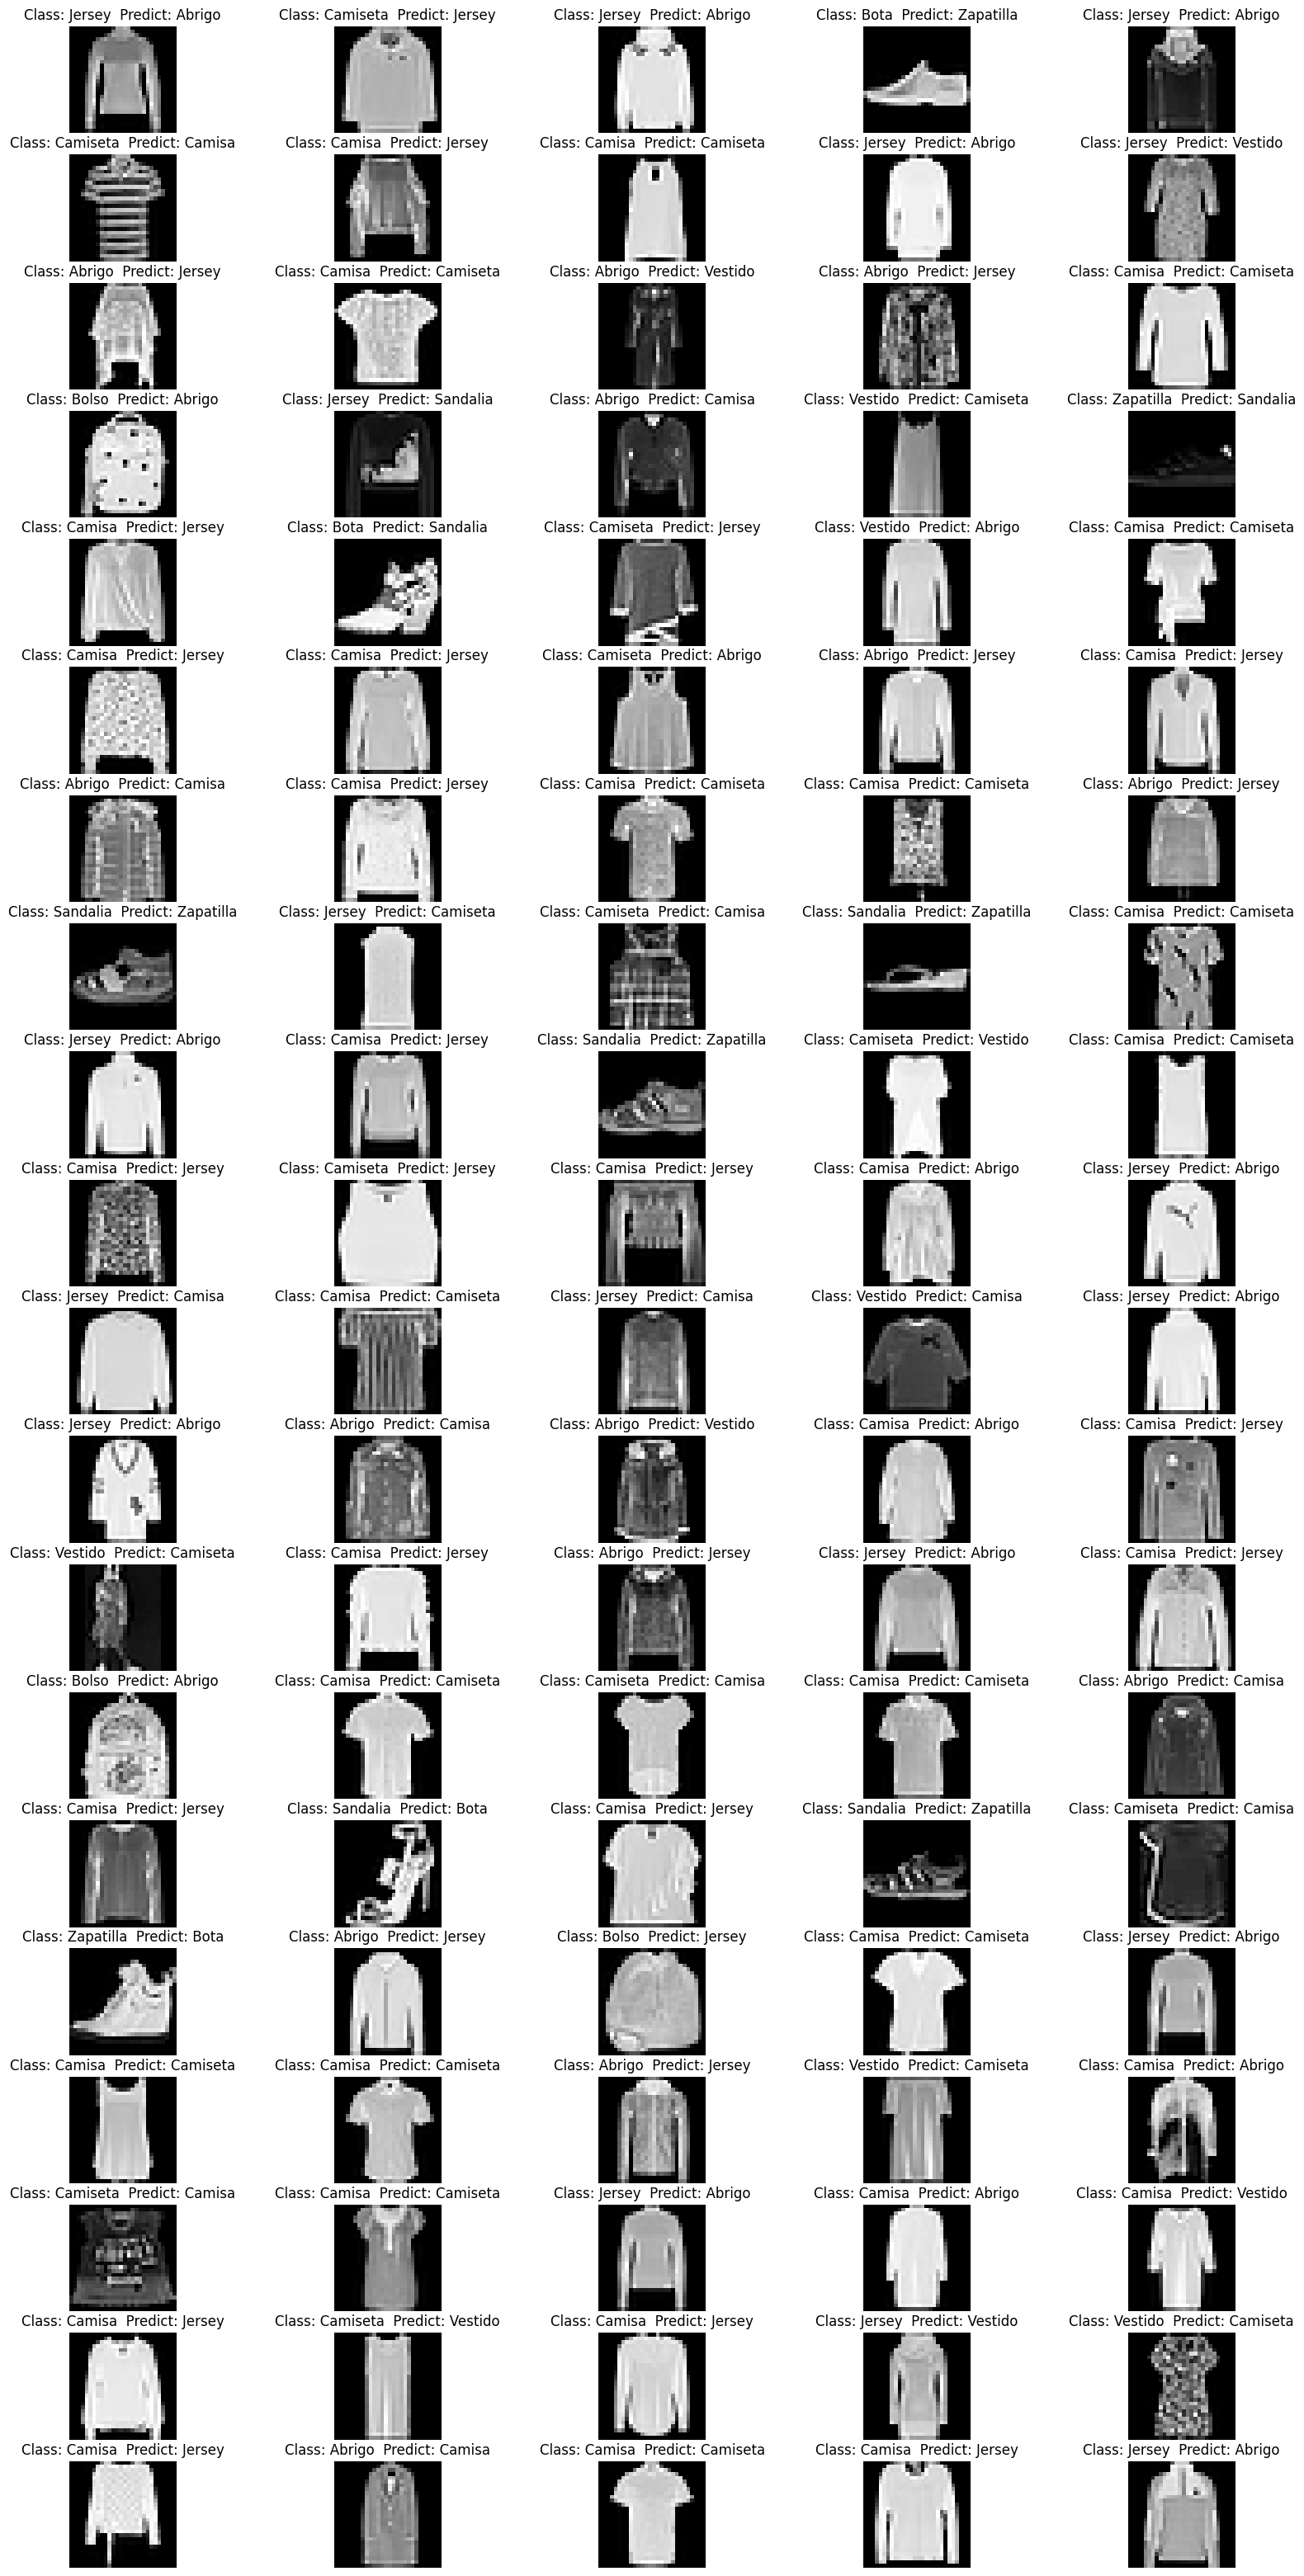

In [6]:
mask = np.array(y_pred != y_test).ravel()
X_mal = X_test[mask]
y_mal = y_test[mask]
y_pred_mal = y_pred[mask]

size = 100
col = 5
row = int(np.ceil(size / col))
fig, axes = plt.subplots(row, col, figsize=(2*2*col, 2*row))

for degree in range(size):
    index = np.random.randint(0, X_mal.shape[0])
    img = X_mal[index, :].reshape(28, 28)
    axes.ravel()[degree].imshow(img, cmap=plt.cm.gray)
    axes.ravel()[degree].set_title(
        f'Class: {clases[int(y_mal.flat[index])]}  Predict: {clases[int(y_pred_mal.flat[index])]}')
    axes.ravel()[degree].axis('off')


## Grafico de barras mostrando el numero de fallos por clase.

Text(0.5, 1.0, 'Fallos por clase')

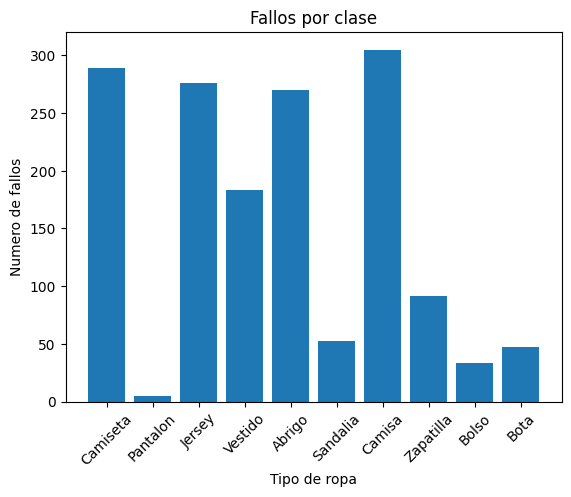

In [8]:
classes = np.arange(10)
valores = np.zeros(10)
for i in range(10):
    valores[i] = np.sum(y_pred[mask] == i)
plt.bar(classes, valores)

plt.xticks(classes, ['Camiseta', 'Pantalon', 'Jersey', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Bota'], rotation=45)
plt.xlabel('Tipo de ropa')
plt.ylabel('Numero de fallos')
plt.title("Fallos por clase")


Como podemos observar las clases que no sean prendas para el torso las clasifica muy bien, ya que son bastante distintas entre sí. Pero las clases como camisa, las suele confundir bastante con otras de su mismo estilo como camiseta o abrigo. Eso es debido a que las imagenes son de baja resolución y están en escala de grises además de que hay 4 clases con forma parecida, cosa que hace que sea difícil distinguirlos con el ojo humano más aun para un clasificador. 

Vamos a intentar optimizar los parámetros, aunque para ello tendremos que reducir el dataset porque sino el tiempo de ejecuión será demasiado largo. Por eso lo que hacemos es creas un subset que tenga un 20% de los elementos de X_test, con el mismo numero de elementos por clase.

In [4]:

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

startTimer = time.perf_counter()

C_values = [0.1, 1.0, 5.0, 10.0]
gamma_values = [0.01, 0.1, 1, 10]

numElementos = int(len(X_train)/10*0.2)

print("Elementos por clase: ", numElementos)

mask = 0 == y_test
clase = X_test[mask]
indices = np.random.choice(len(clase), size= numElementos, replace=False)
X_subsample = clase[indices]
y_subsample = y_test[indices]



for i in range(1,10):
    mask = i == y_test
    clase = X_test[mask]
    indices = np.random.choice(len(clase), size= numElementos, replace=False)
    X_subsample = np.vstack((X_subsample, clase[indices]))
    y_subsample = np.vstack((y_subsample, y_test[indices]))
    
print("SHAPE X_subsample: ",X_subsample.shape)


param_grid = {'C': C_values, 'gamma': gamma_values}


rs = ShuffleSplit(n_splits=1, test_size=.20, random_state=0)

clasificadores = GridSearchCV(svm.SVC(), param_grid, n_jobs=-1, cv=rs)

clasificadores.fit(X_train, y_train)

C_best = clasificadores.best_params_["C"]
gamma_best = clasificadores.best_params_["gamma"]

print("Mejores parámetros C: {}, gamma: {}".format(C_best, gamma_best))

# Crea y entrena un modelo SVC con C_best y gamma_best sobre los datos de train originales (X e y)
clf = svm.SVC(C=C_best, gamma=gamma_best)
clf.fit(X_train, y_train)

# Realizamos predicciones con el clasificador entrenado
y_pred = clf.predict(X_test)

# Calculamos el porcentaje de aciertoº
accuracy = np.mean(y_pred == y_test)
print("Precisión: {:.2f}%".format(accuracy * 100))

# Detenemos el contador de tiempo
endTimer = time.perf_counter()

# Calculamos el tiempo transcurrido
elapsed = endTimer - startTimer
# Obtenemos el tiempo transcurrido en minutos y segundos
minutes, seconds = divmod(elapsed, 60)

# Mostramos el tiempo transcurrido en minutos y segundos
print(f"Tiempo transcurrido: {minutes:.0f} minutos {seconds:.2f} segundos")

Elementos por clase:  1119
SHAPE X_subsample:  (11190, 784)
Mejores parámetros C: 1.0, gamma: 0.01
Precisión: 9.52%
Tiempo transcurrido: 515 minutos 42.53 segundos


Como podemos ver en nuestro caso al tener un dataset de imagenes (784 atributos) es extremadamente lento. Aparte de eso, los resultados obtenidos son muy malos, eso se puede deber a que con esos parámetros está sobreaprendiendo al hacer el entrenamiento o a que el rango de valores usados para el gridSearchCV no es lo suficientemente amplio (ampliarlo más sería inviable). En conclusión en nuestro caso los valores por defecto (C=1 y gamma = 'scale') son lo que mejor resultados dan.

## CLASIFICADOR 2: MLP (Scikit-learn)

Ahora vamos a realizar la clasificación pero con un MLP de scikit-learn. Tras diversas pruebas y buscar en internet hemos comprobado que el optimizador que mejor funciona en este caso es el 'adam' ya que 'lbfgs' es bastante lento y da algo peor, 'sgd' directamente da malos resulatos ya que está pensado para datasets más grandes. 

Para saber el tamaño óptimo con una sola capa realizaremos la siguiente prueba:

### METODO 1

Una sola capa


100%|██████████| 15/15 [21:22<00:00, 85.52s/it]

Max accuracy de 0.8648571428571429 con tamaño 121


Text(0, 0.5, 'Accuracy')

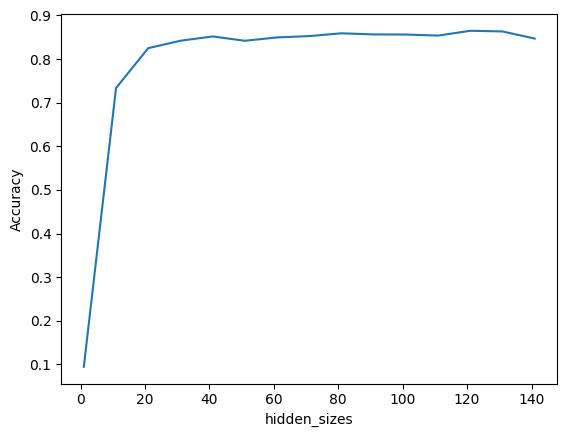

In [24]:
hidden_sizes = range(1, 150, 10)
accuracies = np.zeros(len(hidden_sizes))
pbar = tqdm(total=len(hidden_sizes))
best = 0

for s, size in enumerate(hidden_sizes):

    clasificador = MLPClassifier(hidden_layer_sizes = size, solver = 'adam', max_iter = 250, alpha=0.01)
    
    clasificador.fit(X_train,y_train.ravel())
    
    y_pred = clasificador.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    
    if accuracies[s] > best:
        best = size
        
    pbar.update(1)
    
    accuracies[s] = acc
pbar.close()
    
print('Max accuracy de {} con tamaño {}'.format( max(accuracies) ,hidden_sizes[np.argmax(accuracies)]))

plt.plot(hidden_sizes, accuracies)
plt.xlabel('hidden_sizes')
plt.ylabel('Accuracy')


Como podemos observar a partir de 20 neuronas la mejora es muy pequeña, por lo que lo más eficiente tiempo/resultado sería usar 20 neuronas

### METODO 2

Tres capas



Ahora lo que haremos será cambiar el tamaño de la primera capa pero haremos una red con 3 capas ocultas

In [25]:
hidden_sizes = range(10, 120, 10)
accuracies = np.zeros(len(hidden_sizes))
best = 0

pbar = tqdm(total=len(hidden_sizes))

for s, size in enumerate(hidden_sizes):

    clasificador = MLPClassifier(hidden_layer_sizes=(size, 30, 20), solver='adam', max_iter=250, alpha=0.01)

    clasificador.fit(X_train, y_train.ravel())

    y_pred = clasificador.predict(X_test)

    acc = accuracy_score(y_pred, y_test)

    accuracies[s] = acc
    
    if accuracies[s] > best:
        best = size
        
    pbar.update(1)
pbar.close()


100%|██████████| 11/11 [37:19<00:00, 203.59s/it]


Max accuracy de 0.8856428571428572 con tamaño 100


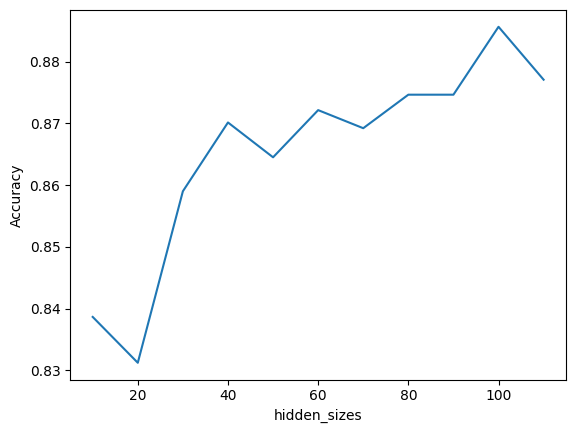

In [26]:
plt.plot(hidden_sizes, accuracies)
plt.xlabel('hidden_sizes')
plt.ylabel('Accuracy')
print('Max accuracy de {} con tamaño {}'.format( max(accuracies) ,hidden_sizes[np.argmax(accuracies)]))

Ahora crearemos el MLP con la mejor configuració para ver los ejemplos que falla:

In [6]:
clasificador = MLPClassifier(hidden_layer_sizes=(100, 30, 20), solver='adam', max_iter=250, alpha=0.01)

clasificador.fit(X_train, y_train.ravel())

y_pred = clasificador.predict(X_test)

Text(0.5, 1.0, 'Fallos por clase')

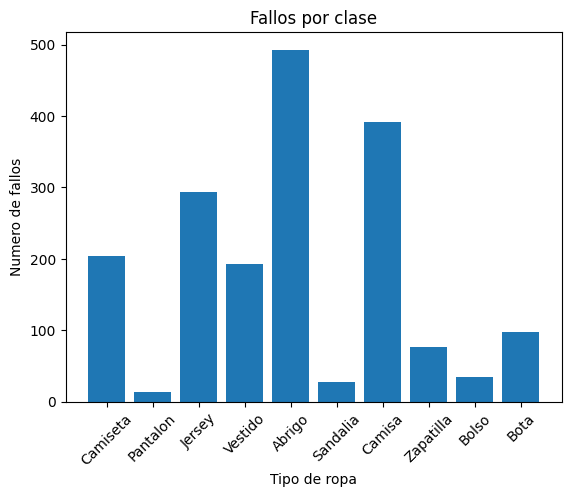

In [7]:
mask = np.array(y_pred != y_test).ravel()
X_mal = X_test[mask]
y_mal = y_test[mask]
y_pred_mal = y_pred[mask]

classes = np.arange(10)
valores = np.zeros(10)
for i in range(10):
    valores[i] = np.sum(y_pred[mask] == i)
plt.bar(classes, valores)

plt.xticks(classes, ['Camiseta', 'Pantalon', 'Jersey', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Bota'], rotation=45)
plt.xlabel('Tipo de ropa')
plt.ylabel('Numero de fallos')
plt.title("Fallos por clase")

Con esta configuración hemos conseguido mejorar el accuracy de nuestro clasificador, pero aun así no logramos superar el 90% de precisión. También podemos observar que el nivel de precisión es parecido al SVM pero falla de distinta manera.

En este caso al igual que con las SVM podríamos optimizar los parámetros alpha o 'max_iter' con gridSearchCV pero tendríamos el mismo problema que antes que sería el tiempo de ejecución, lo que lo vuelve en nuestro caso algo inviable.

## CLASIFICADOR 3: MLP (Tensorflow)

Hemos usado Tensorflow ya que es mucho mas rapido (al usar gpu)  y mas facil de implementar.

Se crea la red neuronal con sus respectivas capas y funciones de activación

In [5]:
def get_clf_model(meta, compilacion, hidden_layer_sizes = (20,) ):
    model = keras.Sequential()
    inp = keras.layers.Input(shape=(meta["n_atributos"]))
    model.add(inp)
    for hidden_layer_size in hidden_layer_sizes:
        layer = keras.layers.Dense(hidden_layer_size, activation="relu")
        model.add(layer)
    if meta["target_type_"] == "binary":
        n_output_units = 1
        output_activation = "sigmoid"
        loss = "binary_crossentropy"
    elif meta["target_type_"] == "multiclass":
        n_output_units = meta["n_classes_"]
        output_activation = "softmax"
        loss = "sparse_categorical_crossentropy"
    else:
        raise NotImplementedError(f"Unsupported task type: {meta['target_type_']}")
    out = keras.layers.Dense(n_output_units, activation=output_activation)
    model.add(out)
    model.compile(loss=loss, optimizer=compilacion["optimizer"])
    return model

Para crear la red neuronal debemos definir los siguientes parámetros:
    meta: es un diccionario el cual tiene los apartados "target_type_" que vendría a ser el tipo de problemas de clasificación (binario o multiclase), "n_classes_" es el numero de clases que tenemos (solo necesario en problemas de más de dos clases) y "n_atributos" es cuanto atributos tenemos en X, en nuestro caso como son imagenes 28 x 28 tenemos 784.
    compilacion: es un diccionario el cual tiene todos los apartados necesarios para la compilacon del clasificador, en nuestro caso solo nos interesa la aprte de "optimizer" que es el tipo de optimizador que usaremos, en este caso al igual que en el de sklearn usaremos el 'adam'.
    hidden_layer_sizes: es una tupla que indica cuantas neuronas va a tener la i-esima capa oculta.
    alpha: es el ratio de aprendizaje

Ahora vamos a crear un MLP con 3 capas oculas y un ratio de aprendizaje de 0.01, pero esta vez haremos haciendo por mini-batch en vez de por lote y usando shuffle = 1 (hace el shuffle antes de escoger los subconjuntos), y epochs = 30 (recorre todo el conjunto X_train 30 veces)

In [9]:
meta = {"target_type_": "multiclass", "n_classes_": 10, "n_atributos": X_train.shape[1]}
compilacion = {"optimizer":"adam"}
hidden_layer_sizes = (100, 60, 20)
alpha = 0.01


clf = KerasClassifier(
    model=get_clf_model(meta = meta, compilacion = compilacion, hidden_layer_sizes = hidden_layer_sizes),
    optimizer__learning_rate = alpha, shuffle = 1,  batch_size= 1000,
    verbose=0, epochs = 200)

print(clf.model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 60)                6060      
                                                                 
 dense_2 (Dense)             (None, 20)                1220      
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
Total params: 85,990
Trainable params: 85,990
Non-trainable params: 0
_________________________________________________________________
None


Con este print podemos ver la estructura de la red neuronal que acabamos de crear. Ahora hacemos el fit y calculamos el score (accuracy) que obtenemos.

In [10]:
clf.fit(X_train, y_train)
print('El accuracy obtenido es de :', clf.score(X_test, y_test))

El accuracy obtenido es de : 0.8726428571428572


## CLASIFICADOR 4: AdaBoost Y OVA

Ahora usaremos adaboost como clasificador. Ya que tenemos un conjunto grande y tenemos ejemplso con muchos atributos vamos a usar 100 estimadores.

In [ ]:

adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=1), 
                                  n_estimators=100, random_state=10)
adaboost.fit(X_train, y_train)
print("Accuracy adaboost : ", round(adaboost.score(X_test,y_test)*100,3))

Accuracy adaboost :  52.45


Como podemos observar da unos resultados bastante malos, por lo que habría que probar con otra forma, y esa sería hacer un OVA de adaboost:

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier

adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=1), 
                                  n_estimators=100, random_state=10)

OVA = OneVsRestClassifier(estimator=adaboost)
OVA.fit(X_train, y_train)

print("Accuracy adaboost : ", round(OVA.score(X_test,y_test)*100,3))

Accuracy adaboost :  85.107


Ahora probaremos incrementando el numero de estimadores:

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier

adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=1), 
                                  n_estimators=150, random_state=10)

OVA = OneVsRestClassifier(estimator=adaboost)
OVA.fit(X_train, y_train)

print("Accuracy adaboost : ", round(OVA.score(X_test,y_test)*100,3))

Accuracy adaboost :  85.321


Como podemos ver la mejora es minima, por lo que no merece la pena la diferencia de tiempo en el entrenamiento.

El adaboost base podemos ver que aunque sea relativamente rápido no da demasidos buenos resultados, aunque hemos comprobado que con un OVO u OVA de adaboost conseguimos mejores resultados.

## CLASIFICADOR 5: RandomForest

Ahora probaremos el randomForest. Hemos decidido usar el criterion gini ya que es más rápido y nos da mejores resultados en este caso. También usamos max_features = 'sqrt' ya que es el que da los mejores resultados ratio accuracy/tiempo (con más atributos la mejora era mínima).

In [8]:
forest = RandomForestClassifier(n_estimators=150,random_state=10,criterion='gini', max_features= 'sqrt', n_jobs=-1)
forest.fit(X_train,y_train)
print("Accuracy adaboost : ", round(forest.score(X_test,y_test)*100,3))

Accuracy adaboost :  88.507


In [18]:
forest = RandomForestClassifier(n_estimators=150,random_state=10,criterion='entropy', max_features= 'sqrt', n_jobs=-1)
forest.fit(X_train,y_train)
print("Accuracy adaboost : ", round(forest.score(X_test,y_test)*100,3))

Accuracy adaboost :  88.214


Para elegir el número de estimadores más adecuado:

100%|██████████| 35/35 [13:46<00:00, 23.60s/it]

Max accuracy de 0.8866428571428572 con tamaño 320


Text(0, 0.5, 'Accuracy')

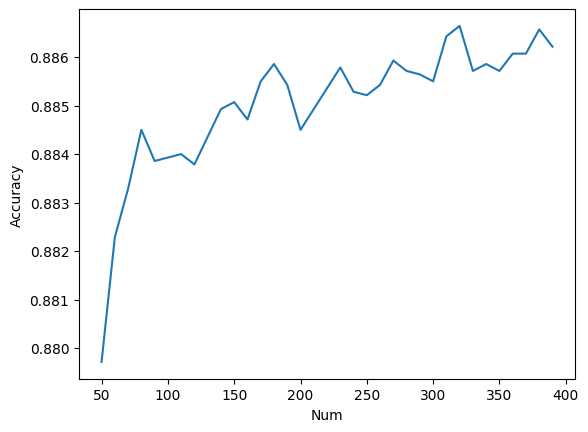

In [17]:
estimadores = range(50, 400, 10)
accuracies = np.zeros(len(estimadores))
pbar = tqdm(total=len(estimadores))

for s, num in enumerate(estimadores):

    clasificador = RandomForestClassifier(n_estimators=num, random_state=10,criterion='gini', max_features= 'sqrt', n_jobs=-1)
    
    clasificador.fit(X_train,y_train)
    
    y_pred = clasificador.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)  
        
    pbar.update(1)
    
    accuracies[s] = acc
pbar.close()
    
print('Max accuracy de {} con tamaño {}'.format( max(accuracies) ,estimadores[np.argmax(accuracies)]))

plt.plot(estimadores, accuracies)
plt.xlabel('NumEstimators')
plt.ylabel('Accuracy')

Podemos ver que con random forest obtenemos resultados relativamente buenos y encima de manera muy rápida a comparación con otros clasificadores. Aumentando el numero de estimadores obtenemos un mejor resultado, pero a partir de 50 estimadores la mejora es muy pequeña, casi que es aleatoria por decimales (dependiendo de los ejemplos escogidos).

Text(0.5, 1.0, 'Fallos por clase')

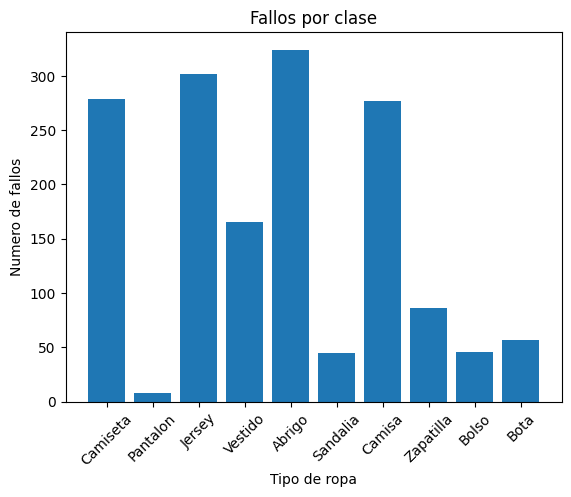

In [20]:
forest = RandomForestClassifier(n_estimators=320, random_state=10,criterion='gini', max_features= 'sqrt', n_jobs=-1)
forest.fit(X_train,y_train)

y_pred = forest.predict(X_test)


mask = np.array(y_pred != y_test).ravel()
X_mal = X_test[mask]
y_mal = y_test[mask]
y_pred_mal = y_pred[mask]

classes = np.arange(10)
valores = np.zeros(10)
for i in range(10):
    valores[i] = np.sum(y_pred[mask] == i)
plt.bar(classes, valores)

plt.xticks(classes, ['Camiseta', 'Pantalon', 'Jersey', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Bota'], rotation=45)
plt.xlabel('Tipo de ropa')
plt.ylabel('Numero de fallos')
plt.title("Fallos por clase")

Aquí podemos ver que el gráfico es batante similar al del SVM. Los fallos más comunes ocurren en las clases camiseta, camisa, jersey y abrigo.

## EXTRA

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier

OVA = OneVsRestClassifier(estimator=svm.SVC())
OVA.fit(X_train, y_train)

print("Accuracy adaboost : ", round(OVA.score(X_test,y_test)*100,3))

Accuracy adaboost :  88.886


Como podemos observar obtenemos la misma precisión usando el ensembler de manera "externa" que con la ya implementada en el SVC de sci-kit, aunque es bastante m´s lenta en comparación (5.9 min el interno y 21 min usando OVA externo).